# Practica 1 - Analisis y Regresion lineal

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importar el csv por medio de pandas
df = pd.read_csv('usa_mercedes_benz_prices.csv')

df

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"
...,...,...,...,...,...
2424,2021 Mercedes-Benz E-Class E 450 4MATIC,"54,422 mi.",NaN,236,"$53,490"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.8,"1,758","$53,983"


In [3]:
df['Rating'].describe()

count    2135.000000
mean        4.533724
std         0.386506
min         2.100000
25%         4.400000
50%         4.600000
75%         4.800000
max         5.000000
Name: Rating, dtype: float64

Interesante: rango de puntuaciones 0 ~ 5.

## Limpieza

In [4]:
df.fillna(df['Rating'].mean(), inplace = True)

In [5]:
def limpiar_precios(row):
    try:
        return int(row.replace(',','').replace('$',''))
    except ValueError:
        return np.nan

In [6]:
df['Price'] = df['Price'].apply(limpiar_precios)

In [7]:
df['Year'] = df['Name'].apply(lambda row: int(row[:4]))

In [8]:
def change_review_dtype(row):
    try:
        return int(row.replace(',',''))
    except AttributeError:
        return row
        

In [9]:
df['Review Count'] = df['Review Count'].apply(change_review_dtype)

In [10]:
def mile_to_kilometer(row):
    int_val: int = int(row.replace(',','')[:-4])
    return 1.60934 * int_val

In [11]:
df['Kilometerage'] = df['Mileage'].apply(mile_to_kilometer)

In [12]:
df.drop(['Name', 'Mileage'], axis = 1, inplace = True)

In [15]:
df.dropna(inplace = True)

In [16]:
df

,Rating,Review Count,Price,Year,Kilometerage
0,3.900000,1800.0,30900.0,2021,47694.40024
1,4.700000,1239.0,139999.0,2022,8915.74360
2,4.700000,1239.0,132999.0,2022,7869.67260
3,4.800000,752.0,58587.0,2020,47871.42764
4,5.000000,1502.0,95990.0,2021,52514.37354
...,...,...,...,...,...
2424,4.533724,236.0,53490.0,2021,87583.50148
2425,4.500000,1334.0,89599.0,2022,18338.42930
2426,4.900000,2375.0,32890.0,2021,48911.06128
2427,4.800000,1758.0,53983.0,2023,5492.67742


In [18]:
df1 = df.loc[:, ['Year', 'Price']].groupby('Year').mean()

# Entrenamiento del modelo

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df1.index.values.reshape(-1, 1), df1['Price'].values.reshape(-1, 1))

LinearRegression()

# Visualizacion

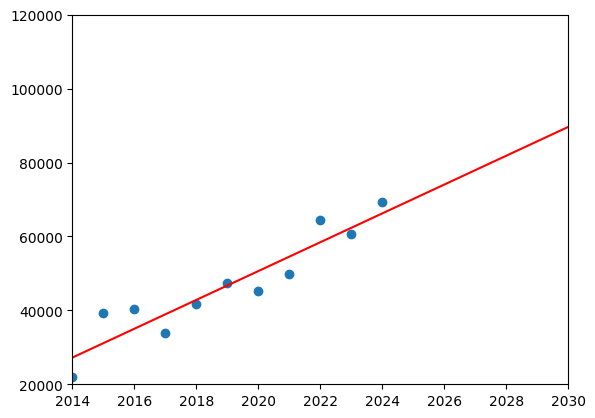

In [35]:
import matplotlib.pyplot as plt
range_ = np.arange(2014, 2031, 1)
fig, ax = plt.subplots()
ax.set(ylim = [20000, 120000], xlim = [2014, 2030])
ax.scatter(df1.index.values.reshape(-1, 1), df1['Price'].values.reshape(-1, 1))
ax.plot(range_, model.predict(range_.reshape(-1, 1)), color = 'red')

# Tarea
Analisis profundo de otras posibilidades de inferencia, ingienieria de datos, etc.